**Problem Statement**

1. The aim of this data science project is to build a predictive model and find
out the sales of each product at a particular store.
2. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.



**Hypothesis Generation**

Hypothesis generation is an essential step in any data science project as it helps to formulate specific questions and expectations that our analysis and predictive model can address. In the context of BigMart's sales prediction project, here are some hypotheses we could consider:

Store Size Hypothesis:

H0 (Null Hypothesis): Store size (measured in terms of store area) has no significant impact on sales.
H1 (Alternative Hypothesis): Store size significantly influences sales, with larger stores likely to have higher sales.
Location Impact Hypothesis:

H0: The location of a store (city-wise) does not affect its sales.
H1: The location of a store significantly affects its sales, with certain cities potentially having higher sales than others.
Product Type Hypothesis:

H0: The type of product (e.g., perishable vs. non-perishable) does not affect its sales.
H1: The type of product significantly influences sales, with certain product types having higher sales.
Promotion Effect Hypothesis:

H0: Promotional activities (e.g., discounts, advertising) have no significant impact on product sales.
H1: Promotional activities significantly affect product sales, with products on promotion likely to have higher sales.
Store Age Hypothesis:

H0: The age of a store has no significant impact on sales.
H1: Older stores may have higher sales due to established customer bases.
Product Visibility Hypothesis:

H0: Product visibility within a store does not affect its sales.
H1: Products placed in more visible locations within the store may have higher sales.
Price Impact Hypothesis:

H0: Product pricing does not significantly affect sales.
H1: Lower-priced products may have higher sales compared to higher-priced ones.
Seasonal Sales Hypothesis:

H0: Seasonality has no significant impact on product sales.
H1: Certain products may experience higher sales during specific seasons or holidays.
Customer Demographics Hypothesis:

H0: Customer demographics (e.g., age, income) do not significantly influence sales.
H1: Sales may vary based on the demographics of the customers in the store's vicinity.
Competition Impact Hypothesis:

H0: The presence of competitors in the same city does not affect a store's sales.
H1: Stores in cities with fewer competitors may have higher sales.

These hypotheses will guide our data exploration, feature engineering, and model building processes. We can test these hypotheses using statistical tests and machine learning models to identify which factors are most important in predicting product sales at BigMart.

**Loading Packages and Data**

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


In [141]:
df = pd.read_csv('/content/Train.csv')

In [142]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**1. Item Weight doesn't add significance to our analysis. Also we could obsereve that there are more than 1500 observation missing. Treating the missing values doesn't make sense. Its better to remove the column itself.**

**Outlet size feature is also having missing values observation around 2500 and treating or keeping this feature is also doesn't look significan't in the light when we have related information about outlet in the form of other features like Outlet_Location_Type and Outlet_Type**

In [144]:
df = df.drop(["Item_Weight", "Outlet_Size"], axis=1)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [146]:
df.sort_values(["Item_Outlet_Sales"], ascending=[False])

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,Low Fat,0.010551,Household,234.9958,OUT027,1985,Tier 3,Supermarket Type3,13086.9648
5223,FDQ19,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Tier 3,Supermarket Type3,12117.5600
1450,FDZ20,Low Fat,0.000000,Fruits and Vegetables,253.0356,OUT027,1985,Tier 3,Supermarket Type3,11445.1020
4349,FDP33,Low Fat,0.088840,Snack Foods,254.2672,OUT027,1985,Tier 3,Supermarket Type3,10993.6896
6541,FDI50,Regular,0.030693,Canned,228.0352,OUT027,1985,Tier 3,Supermarket Type3,10306.5840
...,...,...,...,...,...,...,...,...,...,...
7388,FDQ47,Regular,0.281510,Breads,33.8874,OUT010,1998,Tier 3,Grocery Store,35.2874
3053,NCL41,Low Fat,0.073077,Health and Hygiene,34.3216,OUT019,1985,Tier 1,Grocery Store,34.6216
2571,FDU21,Regular,0.134328,Snack Foods,35.0558,OUT019,1985,Tier 1,Grocery Store,33.9558
6950,NCR42,Low Fat,0.064411,Household,33.3900,OUT010,1998,Tier 3,Grocery Store,33.2900


In [147]:
df.groupby(["Item_Type","Outlet_Type"]).size().head(60)

Item_Type              Outlet_Type      
Baking Goods           Grocery Store         85
                       Supermarket Type1    426
                       Supermarket Type2     68
                       Supermarket Type3     69
Breads                 Grocery Store         33
                       Supermarket Type1    160
                       Supermarket Type2     27
                       Supermarket Type3     31
Breakfast              Grocery Store         19
                       Supermarket Type1     68
                       Supermarket Type2     12
                       Supermarket Type3     11
Canned                 Grocery Store         73
                       Supermarket Type1    426
                       Supermarket Type2     78
                       Supermarket Type3     72
Dairy                  Grocery Store         92
                       Supermarket Type1    450
                       Supermarket Type2     73
                       Supermarket Type3     67

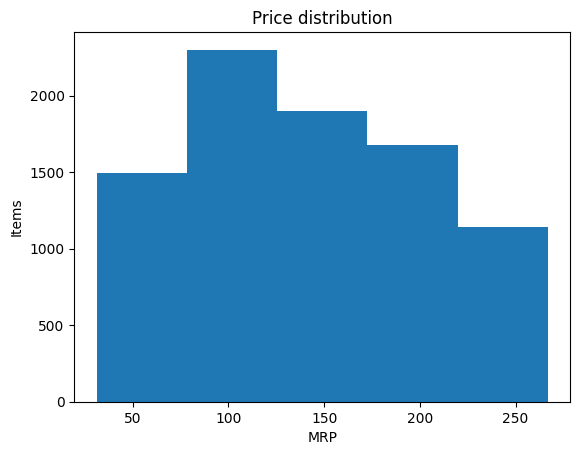

In [148]:
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(df['Item_MRP'],bins = 5)
#Labels and Tit
plt.title('Price distribution')
plt.xlabel('MRP')
plt.ylabel('Items')
plt.show()

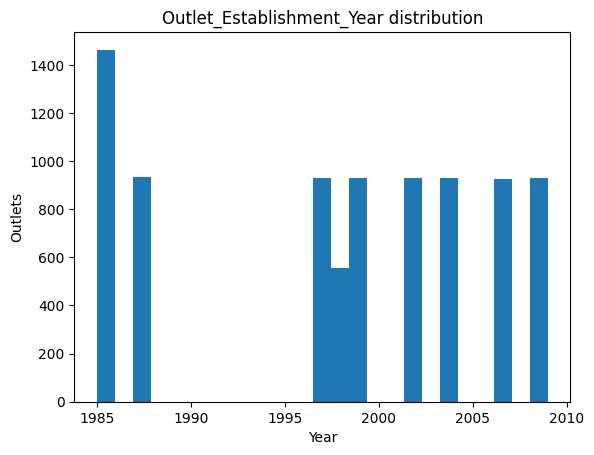

In [149]:
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.hist(df['Outlet_Establishment_Year'],bins = 25)
#Labels and Tit
plt.title('Outlet_Establishment_Year distribution')
plt.xlabel('Year')
plt.ylabel('Outlets')
plt.show()

**Old outlets established in 1985 seems more in number than other established later.**

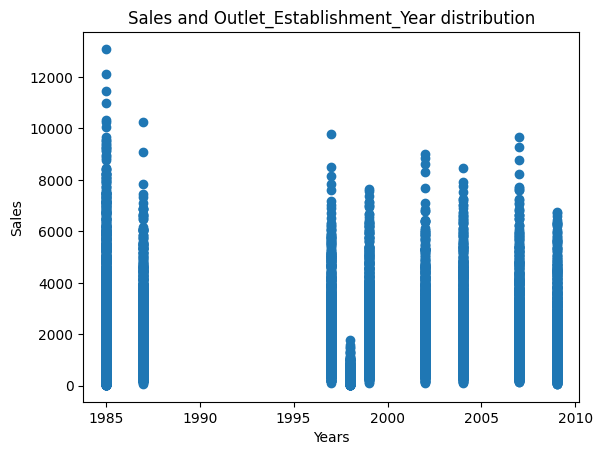

In [150]:
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.scatter(df['Outlet_Establishment_Year'],df['Item_Outlet_Sales'])
#Labels and Tit
plt.title('Sales and Outlet_Establishment_Year distribution')
plt.xlabel('Years')
plt.ylabel('Sales')
plt.show()

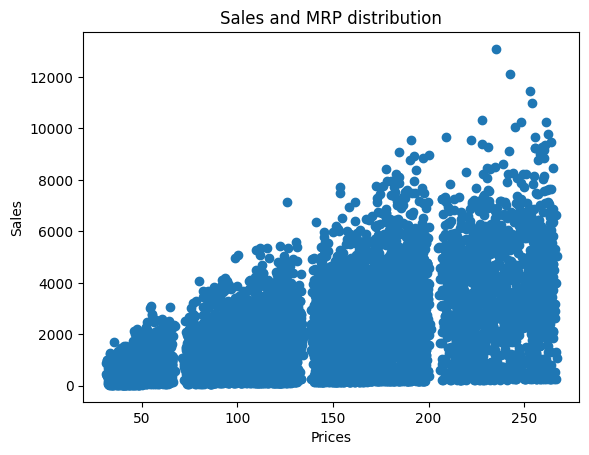

In [151]:
fig=plt.figure()
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)
#Variable
ax.scatter(df['Item_MRP'],df['Item_Outlet_Sales'])
#Labels and Tit
plt.title('Sales and MRP distribution')
plt.xlabel('Prices')
plt.ylabel('Sales')
plt.show()

In [152]:
df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
90%,0.139514,231.200480,2009.000000,4570.051200
95%,0.163780,250.769240,2009.000000,5522.811000
99%,0.226249,263.022600,2009.000000,7366.011720


**For Item_Outlet_Sales there isn't gradual increase in the sales after 95th percentile. And hence we can conclude that extreme outliers are present in the Item_Outlet_Sales Column.**

In [153]:
df.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

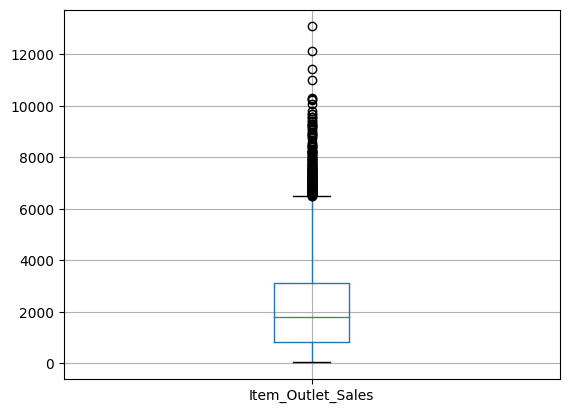

In [154]:
df.boxplot(column=["Item_Outlet_Sales"])

In [155]:
# Calculate the IQR for 'Item_Outlet_Sales'
Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and handle outliers
outliers = df[(df['Item_Outlet_Sales'] < lower_bound) | (df['Item_Outlet_Sales'] > upper_bound)]

# You can choose how to handle the outliers, either by removing or replacing them
# To remove outliers:
#df = df[(df['Item_Outlet_Sales'] >= lower_bound) & (df['Item_Outlet_Sales'] <= upper_bound)]

# To replace outliers with the upper bound (you can choose another replacement value if needed):
df.loc[df['Item_Outlet_Sales'] > upper_bound, 'Item_Outlet_Sales'] = upper_bound


<Axes: >

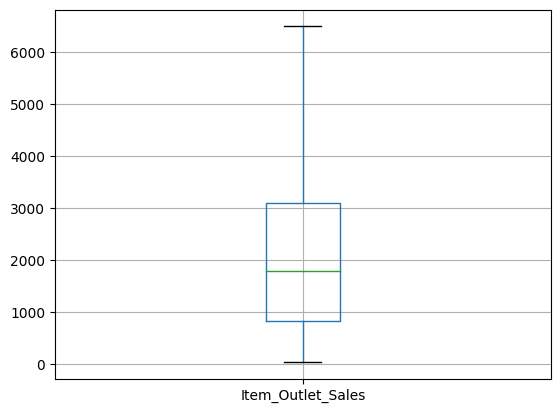

In [156]:
df.boxplot(column=["Item_Outlet_Sales"])

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

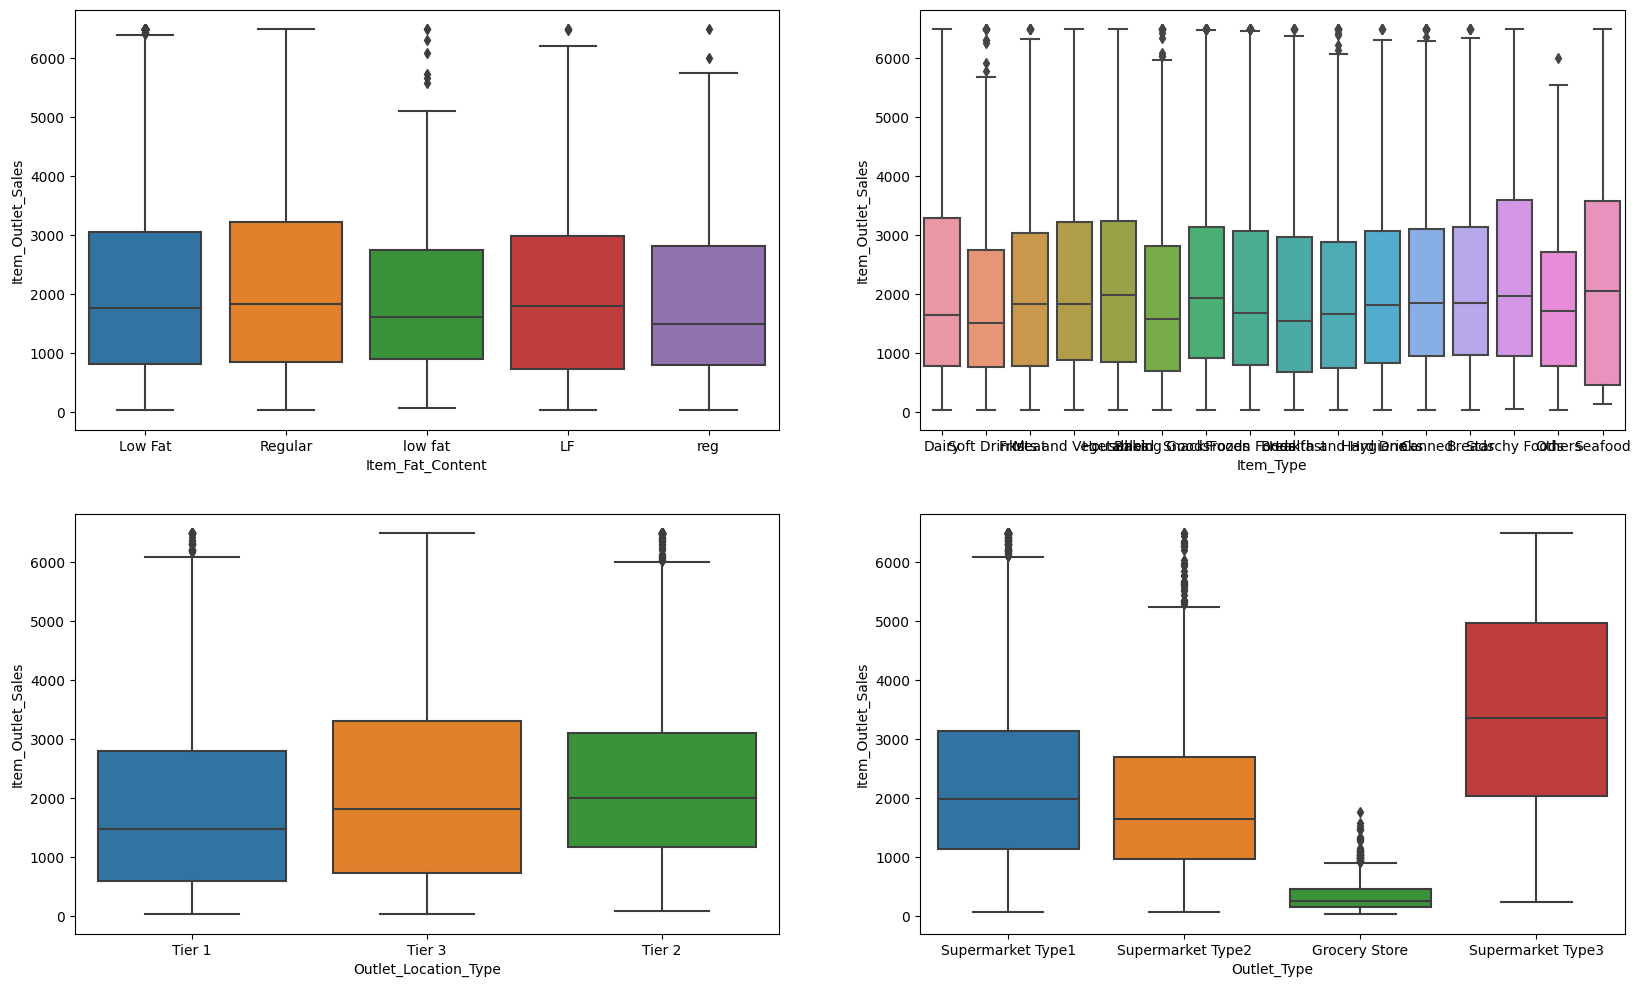

In [157]:
plt.figure(figsize=(20,12)) #Its not neccessary to write this explicitly its just that we can control the size of fig.
plt.subplot(2,2,1) # Basically I want 2 rows 3 colums and 1 indicates 1st boxplot
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)

plt.subplot(2,2,2)
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)

plt.subplot(2,2,3)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df)

plt.subplot(2,2,4)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)

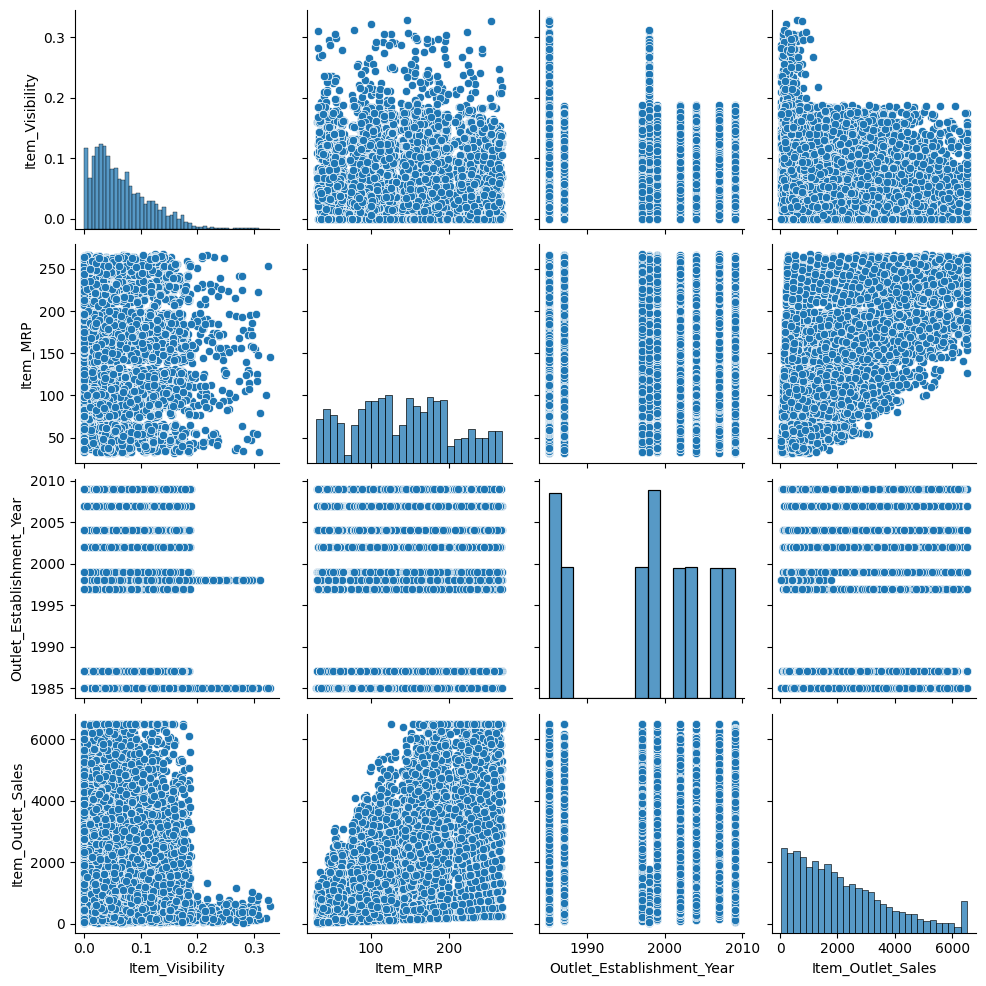

In [158]:
#Visualization of numerical variables for linearity.
sns.pairplot(df)

In [159]:
# Assuming you have a DataFrame named 'df' and want to one-hot encode multiple columns
columns_to_encode = ["Item_Fat_Content", "Item_Type", "Outlet_Location_Type", "Outlet_Type"]

# Use pd.get_dummies to one-hot encode the specified columns
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

df.head()

,Item_Identifier,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,0.016047,249.8092,OUT049,1999,3735.1380,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,0.019278,48.2692,OUT018,2009,443.4228,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
2,FDN15,0.016760,141.6180,OUT049,1999,2097.2700,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,FDX07,0.000000,182.0950,OUT010,1998,732.3800,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,0.000000,53.8614,OUT013,1987,994.7052,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


**Training Model**

In [160]:
X = df.drop(["Item_Outlet_Sales","Item_Identifier", "Outlet_Identifier"], axis=1)

In [161]:
y = df["Item_Outlet_Sales"]

In [162]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state= 100)

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
#Instantiate an object
scaler = StandardScaler()

In [165]:
X_train.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4122,0.093171,127.3652,1999,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6590,0.141138,155.0998,1987,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
5460,0.048980,148.7050,1985,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4541,0.075702,124.6388,2002,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4186,0.035248,84.7224,1999,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [166]:
X_train[['Item_Visibility','Item_MRP','Outlet_Establishment_Year']] = scaler.fit_transform(X_train[['Item_Visibility','Item_MRP','Outlet_Establishment_Year']])
X_train.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4122,0.527923,-0.215801,0.150921,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6590,1.466055,0.227862,-1.285307,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
5460,-0.336341,0.125566,-1.524678,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4541,0.186265,-0.259415,0.509978,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4186,-0.604917,-0.897946,0.150921,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [167]:
X_test[['Item_Visibility','Item_MRP','Outlet_Establishment_Year']] = scaler.transform(X_test[['Item_Visibility','Item_MRP','Outlet_Establishment_Year']])
X_test.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
3454,2.024008,0.682597,-1.285307,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3386,-0.600574,1.846756,1.108406,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
235,-0.442080,0.832295,-1.524678,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
7201,-0.270723,-0.523533,1.108406,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7782,-0.429979,0.631491,-0.088450,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


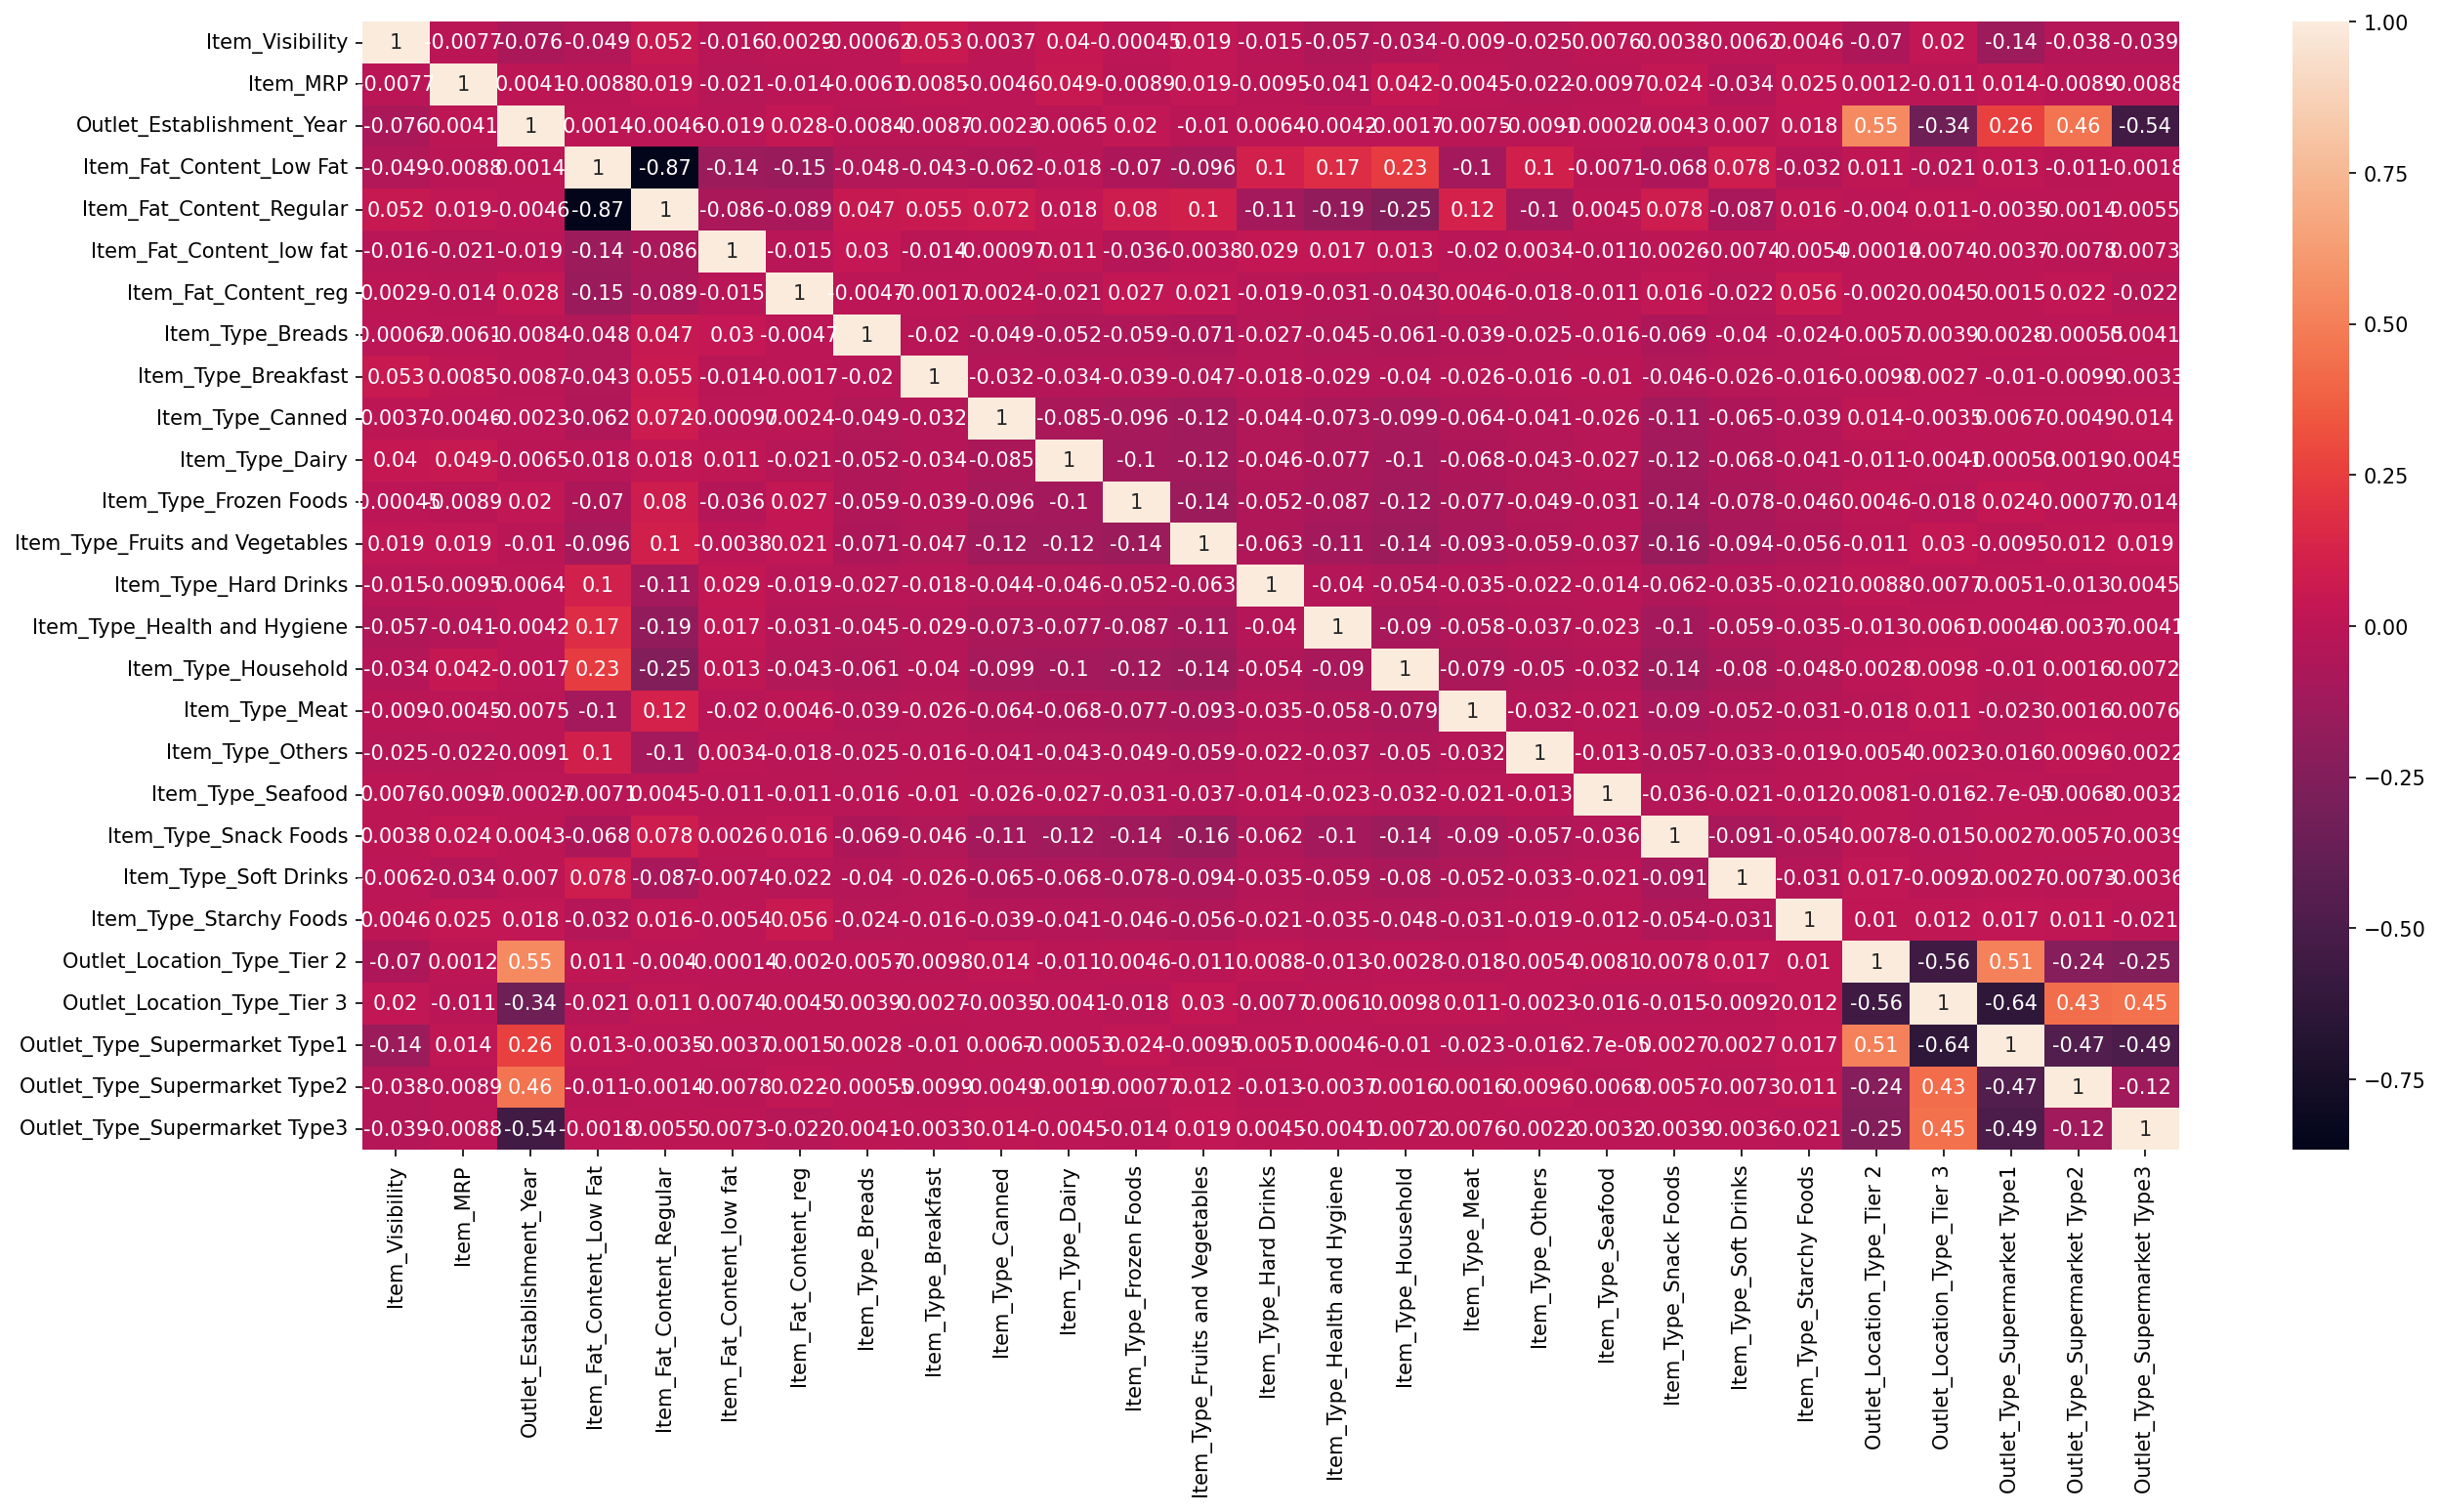

In [168]:
#Let's see the correlation matrix
plt.figure(figsize=(20,10), dpi=150)
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [169]:
# Creating an instance of the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating the R-squared score
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.5602973251983283


In [170]:
# 16) Regularized Linear Regression (Ridge)
ridge = Ridge(alpha=1.0)  # You can adjust the alpha value for regularization
ridge.fit(X_train, y_train)
ridge_predictions = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Regularized Linear Regression MSE:", ridge_mse)

Regularized Linear Regression MSE: 1131748.6803853032


In [171]:
# 17) RandomForest
rf = RandomForestRegressor(n_estimators=100, random_state=100)  # You can adjust hyperparameters
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print("RandomForest MSE:", rf_mse)

RandomForest MSE: 1136410.9681299725


In [173]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import joblib

In [174]:
# 18) XGBoost
xgb = XGBRegressor(n_estimators=100, random_state=100)  # You can adjust hyperparameters
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
print("XGBoost MSE:", xgb_mse)

XGBoost MSE: 1198832.229039025


In [175]:
# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=100), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

In [176]:
# Hyperparameter tuning for GradientBoostingRegressor (GBR)
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_search_gbr = GridSearchCV(estimator=GradientBoostingRegressor(random_state=100), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_gbr.fit(X_train, y_train)
best_gbr = grid_search_gbr.best_estimator_

In [177]:
# Make final predictions on the test dataset
final_xgb_predictions = best_xgb.predict(X_test)
final_gbr_predictions = best_gbr.predict(X_test)

# Save the final models
joblib.dump(best_xgb, 'xgboost_model.pkl')
joblib.dump(best_gbr, 'gradient_boosting_model.pkl')

# You can also save the scalers if needed
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']